# Testing algorithm performance

The Java code has run to calculate in-degree centrality, Page-Rank score, and strongly connected components (appying Tarjan's algorithm) on graphs ranging from 100 to 3000 vertices in steps of 100 (number of edges increases quadratically) and the execution time was recorded. Each case was tested 50 times to get better statistics. The Girvan-Newmann algorithm for community detection, however, was only tested for one iteration on the 100 to 1000 vertices graphs and only 3 times due to its much higher complexity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# load the specifications of the test graphs
df_graphs = pd.read_csv("data/TestPerformance/graphs.text",header=None,names=["vertices","edges","vertices_edges"])
df_graphs.head()

,vertices,edges,vertices_edges
0,100,115,215
1,200,421,621
2,300,919,1219
3,400,1590,1990
4,500,2525,3025


#### In-degree centrality
This quantity is easy to calculate if edges are stored as adjacency lists. We just iterate through all vertices' adjacency lists and count +1 for every time a vertex has an incoming edge, then divide every value by V-1, where V is the number of vertices. Hence, the algorithm should run in O(E), where E is the number of edges.

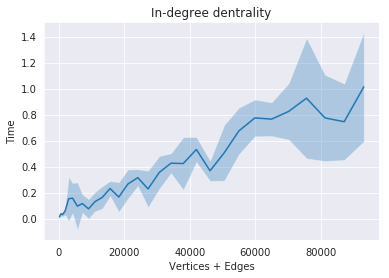

In [2]:
# read in the IDC data
df_idc= pd.read_csv("data/TestPerformance/IDClog.txt",header=None).dropna(axis=1).set_index(df_graphs.vertices_edges)
# calculate mean, standard deviation, and scalebetween 0 and 1
df_idc["idc_mean"] = df_idc.mean(axis=1)/(df_idc.mean(axis=1).max()-(df_idc.mean(axis=1).min()))
df_idc["idc_std"] = df_idc.std(axis=1)/(df_idc.mean(axis=1).max()-(df_idc.mean(axis=1).min()))

# plot a figure
fig, ax = plt.subplots()
ax.plot(df_idc.index,df_idc.idc_mean)
ax.fill_between(df_idc.index,
                df_idc.idc_mean+df_idc.idc_std,
                df_idc.idc_mean-df_idc.idc_std, alpha=0.3)
_ = ax.set_title("In-degree dentrality")
_ = ax.set_ylabel("Time")
_ = ax.set_xlabel("Vertices + Edges")
plt.savefig("data/Figures/perfIDC.png")

#### Page Rank
The algorithm calculates how much "contribution" each vertex gets over any incoming edge it has from another vertex so the complexity should be O(E+V).

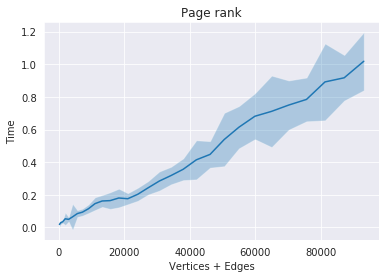

In [3]:
# read in the PR data
df_pr= pd.read_csv("data/TestPerformance/PRlog.txt",header=None).dropna(axis=1).set_index(df_graphs.vertices_edges)
# calculate mean, standard deviation, and scalebetween 0 and 1
df_pr["pr_mean"] = df_pr.mean(axis=1)/(df_pr.mean(axis=1).max()-(df_pr.mean(axis=1).min()))
df_pr["pr_std"] = df_pr.std(axis=1)/(df_pr.mean(axis=1).max()-(df_pr.mean(axis=1).min()))
# plot a figure
fig, ax = plt.subplots()
ax.plot(df_pr.index,df_pr.pr_mean)
ax.fill_between(df_pr.index,
                df_pr.pr_mean+df_pr.pr_std,
                df_pr.pr_mean-df_pr.pr_std, alpha=0.3)
_ = ax.set_title("Page rank")
_ = ax.set_ylabel("Time")
_ = ax.set_xlabel("Vertices + Edges")
plt.savefig("data/Figures/perfPR.png")

#### Tarjan algorithm fro detecting strongly connected components
The algorithm is based on a recursive depth-first-search, basically going along all paths in a component until it finds no more edges to go along, which means it found a full component. It's complexity is O(E+V).

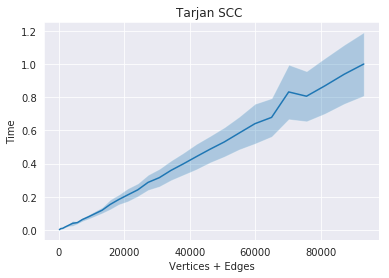

In [4]:
# read in the SCC data
df_scc= pd.read_csv("data/TestPerformance/SCClog.txt",header=None).dropna(axis=1).set_index(df_graphs.vertices_edges)
# calculate mean, standard deviation, and scalebetween 0 and 1
df_scc["scc_mean"] = df_scc.mean(axis=1)/(df_scc.mean(axis=1).max()-(df_scc.mean(axis=1).min()))
df_scc["scc_std"] = df_scc.std(axis=1)/(df_scc.mean(axis=1).max()-(df_scc.mean(axis=1).min()))
# plot a figure
fig, ax = plt.subplots()
ax.plot(df_scc.index,df_scc.scc_mean)
ax.fill_between(df_scc.index,
                df_scc.scc_mean+df_scc.scc_std,
                df_scc.scc_mean-df_scc.scc_std, alpha=0.3)
_ = ax.set_title("Tarjan SCC ")
_ = ax.set_ylabel("Time")
_ = ax.set_xlabel("Vertices + Edges")
plt.savefig("data/Figures/perfSCC.png")

#### Girvan-Newman algorithm for detecting communities
The algorithm removes edges with highest betweenness centrality to split apart communities. It first calculates the edge betweenness centrality for all edges, which means that it has to find all shortest paths from any vertex to any other vertex in the graph an see how many of these paths go through an edge. If there is more than one shortest path from one vertex to another, the paths have to be counted fractionally to an edges betweenness centrality. Finding shortest paths is done by a breath-first-search, complexity O(E+V), and it's done for every vertex combination, so finding all shortest paths should be of complexity O((E+V)$^{2}$). Then it has to calculate how many of all possible shortest paths between a pair of vertices, so I think the complexity should be somethink like O((E+V)$^{2}$+E) for one iteration (we are only looking at one iteration here), so it looks somewhat quadratic. For all possible iterations, meaning removing all eges it would look qubic, and for a realistic case wgere we want to find a certain number of communities, probably somewhere in between quadratic and cubic big O.


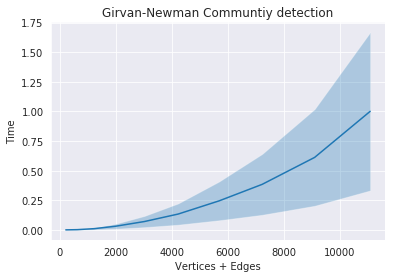

In [5]:
# read in the GN data
df_gn= pd.read_csv("data/TestPerformance/GNlog.txt",header=None).dropna(axis=1).set_index(df_graphs.vertices_edges[:10])
# calculate mean, standard deviation, and scalebetween 0 and 1
df_gn["gn_mean"] = df_gn.mean(axis=1)/(df_gn.mean(axis=1).max()-(df_gn.mean(axis=1).min()))
df_gn["gn_std"] = df_gn.std(axis=1)/(df_gn.mean(axis=1).max()-(df_gn.mean(axis=1).min()))
# plot a figure
fig, ax = plt.subplots()
ax.plot(df_gn.index,df_gn.gn_mean)
ax.fill_between(df_gn.index,
                df_gn.gn_mean+df_gn.gn_std,
                df_gn.gn_mean-df_gn.gn_std, alpha=0.3)
_ = ax.set_title("Girvan-Newman Communtiy detection")
_ = ax.set_ylabel("Time")
_ = ax.set_xlabel("Vertices + Edges")
plt.savefig("data/Figures/perfGN.png")

#### All together

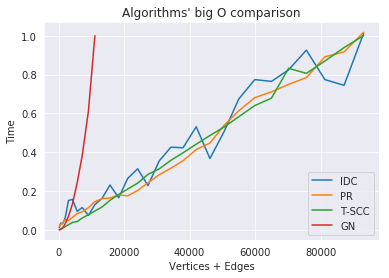

In [6]:
fig, ax = plt.subplots()
ax.plot(df_idc.index,df_idc.idc_mean,label="IDC")
ax.plot(df_pr.index,df_pr.pr_mean,label="PR")
ax.plot(df_scc.index,df_scc.scc_mean,label="T-SCC")
ax.plot(df_gn.index,df_gn.gn_mean,label="GN")
ax.legend()
_ = ax.set_title("Algorithms' big O comparison")
_ = ax.set_ylabel("Time")
_ = ax.set_xlabel("Vertices + Edges")
plt.savefig("data/Figures/perfAll.png")